In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def change_legend(ax, new_loc, fontsize, titlesize, **kws):
        '''funzione per modificare posizione e font size della legenda generata da seaborn'''

        old_legend = ax.legend_
        handles = old_legend.legendHandles
        labels = [t.get_text() for t in old_legend.get_texts()]
        title = old_legend.get_title().get_text()

        ax.legend(handles, labels, loc=new_loc, title=title, fontsize=fontsize, title_fontsize=titlesize, frameon = True, fancybox = False, framealpha = 0.5, **kws)

        return

In [3]:
RUNNUMBER = 1265
INPUT_PATH = '/lustre/cmswork/nlai/DATA/raw_data/'
PLOT_PATH = '/lustre/cmswork/nlai/PLOTS/OCCUPANCY/THESIS/'

INPUT_FILE = INPUT_PATH + f'RUN00{RUNNUMBER}_data.txt'

if not os.path.exists(PLOT_PATH):
    os.makedirs(PLOT_PATH)

In [4]:
stream = pd.read_csv(INPUT_FILE, sep=' ')

In [5]:
stream['TIME'] = stream['ORBIT_CNT']*3564*25 + stream['BX_COUNTER']*25 + stream['TDC_MEAS']*25/30

In [6]:
data = stream[(stream['TDC_CHANNEL']!=128)]

In [7]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,2,0,75,111827,1072,4.0,9.963813e+09
1,2,1,3,111827,1072,22.0,9.963813e+09
2,2,0,70,111827,1074,1.0,9.963813e+09
3,2,1,19,111828,1043,14.0,9.963901e+09
4,2,0,78,111854,2425,30.0,9.966252e+09
...,...,...,...,...,...,...,...
174195774,2,1,20,701456247,2372,10.0,6.249975e+13
174195775,2,1,70,701456247,2372,28.0,6.249975e+13
174195776,2,0,89,701456247,2376,12.0,6.249975e+13
174195777,2,1,21,701456247,2374,1.0,6.249975e+13


In [8]:
run_time = (data['TIME'].max() - data['TIME'].min()) * 1e-9
print(f'Duration of the run:\n {round(run_time)} seconds \n {round(run_time/60)} minutes \n {round(run_time/3600)} hours')

Duration of the run:
 62490 seconds 
 1041 minutes 
 17 hours


In [9]:
data_fpga0 = data[(data['FPGA']==0)]
data_fpga1 = data[(data['FPGA']==1)]

In [10]:
hist_0, _ = np.histogram(data_fpga0['TDC_CHANNEL'], bins=np.arange(129))
hist_1, _ = np.histogram(data_fpga1['TDC_CHANNEL'], bins=np.arange(129))

In [11]:
rate_0 = hist_0 / run_time
rate_1 = hist_1 / run_time

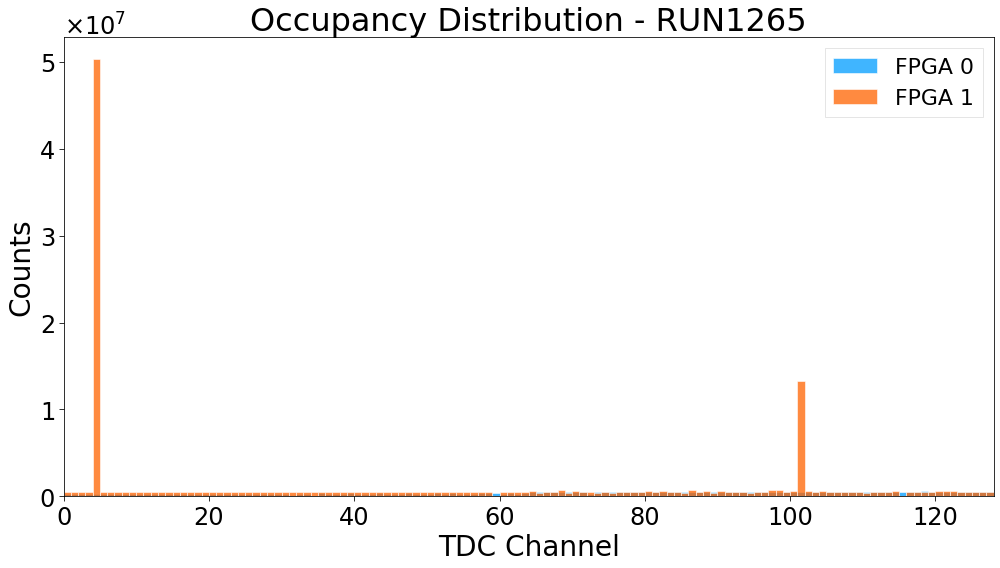

In [12]:
fig, ax = plt.subplots(figsize=(14,8))

ax = sns.histplot(
                    x=np.arange(128),  bins=np.arange(129), weights=hist_0,
                    stat='count', element='bars', fill=True, 
                    color='#009cff', edgecolor='white', label='FPGA 0'
                )

ax = sns.histplot(
                    x=np.arange(128),  bins=np.arange(129), weights=hist_1,
                    stat='count', element='bars', fill=True, 
                    color='#FF6300', edgecolor='white', label='FPGA 1'
                )

# ax.axvline(64, color='black', linestyle='dashed', linewidth=1, alpha=1)


ax.set_xlim(0, 128)


ax.set_title(f'Occupancy Distribution - RUN{RUNNUMBER}', fontsize = 32)
ax.set_xlabel('TDC Channel', fontsize = 28)
ax.set_ylabel('Counts', fontsize = 28)

ax.tick_params(axis = 'both', which = 'major', labelsize = 24, direction = 'out', length = 5)
ax.yaxis.get_offset_text().set_fontsize(24)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))

ax.legend()
change_legend(ax=ax, new_loc="upper right", fontsize=22, titlesize=0)

fig.tight_layout()

fig.savefig(PLOT_PATH+f'RUN{RUNNUMBER}_occ.pdf', facecolor='white')

plt.show()

In [13]:
# for i in range(1, len(rate_0)-1):
#     if (rate_0[i] - rate_0[i-1] > 1) and (rate_0[i] - rate_0[i+1] > 1):
#         rate_0[i] = (rate_0[i-1]+rate_0[i+1])/2
        
# for i in range(1, len(rate_1)-1):
#     if (rate_1[i] - rate_1[i-1] > 1) and (rate_1[i] - rate_1[i+1] > 1):
#         rate_1[i] = (rate_1[i-1]+rate_1[i+1])/2

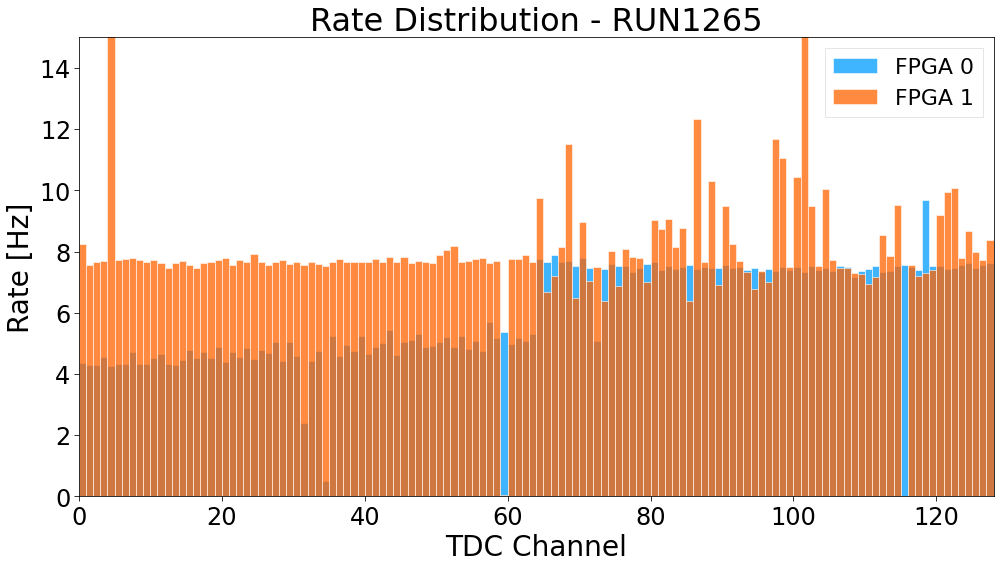

In [14]:
fig, ax = plt.subplots(figsize=(14,8))

ax = sns.histplot(
                    x=np.arange(128),  bins=np.arange(129), weights=rate_0,
                    stat='count', element='bars', fill=True, 
                    color='#009cff', edgecolor='white', label='FPGA 0'
                )

ax = sns.histplot(
                    x=np.arange(128),  bins=np.arange(129), weights=rate_1,
                    stat='count', element='bars', fill=True, 
                    color='#FF6300', edgecolor='white', label='FPGA 1'
                )

# ax.axvline(64, color='black', linestyle='dashed', linewidth=1, alpha=1)

ax.set_xlim(0, 128)
ax.set_ylim(0, 15)



ax.set_title(f'Rate Distribution - RUN{RUNNUMBER}', fontsize = 32)
ax.set_xlabel('TDC Channel', fontsize = 28)
ax.set_ylabel('Rate [Hz]', fontsize = 28)

ax.tick_params(axis = 'both', which = 'major', labelsize = 24, direction = 'out', length = 5)
ax.yaxis.get_offset_text().set_fontsize(24)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,3))

ax.legend()
change_legend(ax=ax, new_loc="upper right", fontsize=22, titlesize=0)

fig.tight_layout()

fig.savefig(PLOT_PATH+f'RUN{RUNNUMBER}_rate.pdf', facecolor='white')

plt.show()